## Final Project Submission

Please fill out:
* Student name: Group 14 (Richard Gachiri, David Githaiga, Linah Ogumbeh, Allan Eshitera and Lemiso Eric) 
* Student pace: part time
* Scheduled project review date/time: 
* Instructor name: 
* Blog post URL:


## a) Introduction

This study aims to address the importance of identifying the factors that significantly influence home costs,Because conventional methods rely on anecdotal evidence or limited research, they often yield incorrect findings. This knowledge gap makes it more difficult for stakeholders to predict and assess changes in house prices. To solve this issue, we are using multiple regression modeling techniques to thoroughly analyze home sales data. Multiple regression is a useful tool for analyzing the relationship between different attributes and home sales prices since it takes into consideration the combined impact of several independent variables.

## b) Business Problem

Real estate valuation poses significant challenges for Rittenhouse Brothers, particularly when determining property values influenced by unique features and the impact of renovations or upgrades. The subjective nature of valuation, varying interprations among appraisers and professionals, and the absense of a purely objective methodology contribute to vakuation discrepancie

## c) Main Objective

This Analysis aims to establish an objective property valuation model, focusing specifically on Property Unique features and the impact of renovations or upgrades. The primary goal is to minimize variations in valution estimates and provide Rittenhouse Brothers with a more standardized and reliable method for assessing property values.

## d) Specific Objectives

1. Perform exploratory data analysis to uncover connections between various variables and the target variable. This process aids in identifying pertinent variables for inclusion in a regression model.

2. Create a multiple regression model to forecast house sale prices by taking into account chosen independent variables and examining their influence on the dependent variable. Validate the model assumptions, evaluate its fitness for the data, and refine the model as needed.

3. Analyze the coefficients of the independent variables within the model to discern their individual contributions to house prices. Identify the most impactful factors infl

## 1. Loading Data

In [1]:
# Your code here - remember to use markdown cells for comments as well!
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import seaborn as sns

# Load data into pandas and engineer "make" feature
data = pd.read_csv("./data/kc_house_data.csv")
data.tail(50)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
21547,9406530090,10/20/2014,337000.0,4,2.50,2470,5100,2.0,NO,NONE,...,8 Good,2470,0.0,2005,0.0,98038,47.3622,-122.041,2240,5123
21548,7168100015,10/9/2014,579950.0,5,2.75,3080,5752,2.0,NO,NONE,...,9 Better,3080,0.0,2014,0.0,98059,47.4922,-122.153,3000,4650
21549,5007500120,2/26/2015,341780.0,4,2.75,2260,4440,2.0,NO,NONE,...,7 Average,2260,0.0,2014,0.0,98001,47.3507,-122.291,2260,4563
21550,3528900770,4/23/2015,710200.0,4,3.00,1670,2642,2.0,NaN,NONE,...,8 Good,1350,320.0,2008,0.0,98109,47.6397,-122.345,1670,2594
21551,9521100031,6/18/2014,690000.0,3,3.25,1540,1428,3.0,NO,NONE,...,9 Better,1540,0.0,2013,NaN,98103,47.6648,-122.353,1660,3300
21552,524059330,1/30/2015,1700000.0,4,3.50,3830,8963,2.0,NO,NONE,...,10 Very Good,3120,710.0,2014,0.0,98004,47.5990,-122.197,2190,10777
21553,6021503705,10/15/2014,329000.0,2,2.50,980,1020,3.0,NO,NONE,...,8 Good,980,0.0,2008,NaN,98117,47.6844,-122.387,980,1023
21554,3438501862,5/13/2014,330000.0,3,2.50,1450,5008,1.0,NO,NONE,...,7 Average,840,610.0,2007,0.0,98106,47.5435,-122.357,2120,5019
21555,3345700207,5/2/2015,608500.0,4,3.50,2850,5577,2.0,NO,NONE,...,8 Good,1950,900.0,2014,0.0,98056,47.5252,-122.192,2850,5708
21556,6056111067,7/7/2014,230000.0,3,1.75,1140,1201,2.0,NO,NONE,...,8 Good,1140,0.0,2014,NaN,98108,47.5637,-122.295,1210,1552


## 2. Exploratory Data

In [2]:
data.shape

(21597, 21)

In [3]:
data.describe() # Statistical distribution of the dataset

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.159700e+04,2.159700e+04,21597.000000,21597.000000,21597.000000,2.159700e+04,21597.000000,21597.000000,21597.000000,17755.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000
mean,4.580474e+09,5.402966e+05,3.373200,2.115826,2080.321850,1.509941e+04,1.494096,1788.596842,1970.999676,83.636778,98077.951845,47.560093,-122.213982,1986.620318,12758.283512
std,2.876736e+09,3.673681e+05,0.926299,0.768984,918.106125,4.141264e+04,0.539683,827.759761,29.375234,399.946414,53.513072,0.138552,0.140724,685.230472,27274.441950
min,1.000102e+06,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,370.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.220000e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,1190.000000,1951.000000,0.000000,98033.000000,47.471100,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,1560.000000,1975.000000,0.000000,98065.000000,47.571800,-122.231000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068500e+04,2.000000,2210.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,9410.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     19221 non-null  object 
 9   view           21534 non-null  object 
 10  condition      21597 non-null  object 
 11  grade          21597 non-null  object 
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  object 
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   17755 non-null  float64
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

In [5]:
data.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [6]:
data.dtypes

id                 int64
date              object
price            float64
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront        object
view              object
condition         object
grade             object
sqft_above         int64
sqft_basement     object
yr_built           int64
yr_renovated     float64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object

## 3. Data Preparation

### a) Data Cleaning

In [7]:
data.isnull().sum()

id                  0
date                0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       2376
view               63
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated     3842
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64

In [8]:
missing_values = data.isna() # Checks missing values 
missing_values.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,False,False,False,False,False,False,False,False,True,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,True,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [9]:
def missing_values(data):
    # identify the total missing values per column
    # sort in order
    miss = data.isnull().sum().sort_values(ascending = False)

    # calculate percentage of the missing values
    percentage_miss = (data.isnull().sum() / len(data)).sort_values(ascending = False)

    # store in a dataframe
    missing = pd.DataFrame({"Missing Values": miss, "Percentage": percentage_miss}).reset_index()

    # remove values that are missing
    missing.drop(missing[missing["Percentage"] == 0].index, inplace = True)

    return missing

In [10]:
missing_data = missing_values(data)
missing_data

,index,Missing Values,Percentage
0,yr_renovated,3842,0.177895
1,waterfront,2376,0.110015
2,view,63,0.002917


Replace the rows with the missing values for **View** with the mode of view

In [11]:
data['view'].value_counts()

NONE         19422
AVERAGE        957
GOOD           508
FAIR           330
EXCELLENT      317
Name: view, dtype: int64

In [12]:
data['view'] = data['view'].fillna(data['view'].mode().iloc[0])

In [13]:
data.isna().sum()

id                  0
date                0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       2376
view                0
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated     3842
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64

Drop the rows with missing values in **Waterfront**

In [14]:
data['waterfront'].value_counts()

NO     19075
YES      146
Name: waterfront, dtype: int64

In [15]:
# Mode imputation for the missing values in waterfront
data['waterfront'] = data['waterfront'].fillna(data['waterfront'].mode().iloc[0])

In [16]:
# check forthe count unique values in the year renoveted colum
data['yr_renovated'].value_counts()

0.0       17011
2014.0       73
2013.0       31
2003.0       31
2007.0       30
          ...  
1951.0        1
1953.0        1
1946.0        1
1976.0        1
1948.0        1
Name: yr_renovated, Length: 70, dtype: int64

In [17]:
# Replace null with the most frequent value
data['yr_renovated'].fillna(0,inplace=True)

In [18]:
data.isna().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

No Missing Values

In [19]:
# Drop rows with '?' in 'sqft_basement'
data = data[data['sqft_basement'] != '?']

# Reset the index of the DataFrame
data.reset_index(drop=True, inplace=True)

In [20]:
# Convert 'sqft_basement' column to float
data['sqft_basement'] = data['sqft_basement'].astype(float)

In [21]:
## Covert the data type for data
data['date'] = pd.to_datetime(data['date'], format = '%m/%d/%Y' )

In [22]:
data.shape

(21143, 21)

### b) Encoding Categorical Columns in the Data

In [23]:
# Encode the column waterfront
waterfront_category_order = {
    'NO': 0,
    "YES" : 1
}

# Perform ordinal encoding on the "waterfront" column
data["waterfront_encoded"] = data["waterfront"].map(waterfront_category_order)

# Replace the original "waterfront" column with the encoded values
data["waterfront"] = data["waterfront_encoded"]

data['waterfront'].value_counts()

0    21001
1      142
Name: waterfront, dtype: int64

In [24]:
# Let's check the count of the encoded column of waterfront
data['waterfront'].value_counts()

0    21001
1      142
Name: waterfront, dtype: int64

In [25]:
# Encode the column view
# Define the order of the categories
view_category_order = {
    "NONE": 0,
    "AVERAGE": 1,
    "GOOD": 2,
    "FAIR": 3,
    "EXCELLENT": 4
}

# Perform ordinal encoding on the "view" column
data["view_encoded"] = data["view"].map(view_category_order)

# Replace the original "view" column with the encoded values
data["view"] = data["view_encoded"]

data['view'].value_counts()

0    19079
1      930
2      496
3      327
4      311
Name: view, dtype: int64

In [26]:
# Let's encode the condition column 
condition_category_order = {
    "Poor": 1,
    "Fair": 2,
    "Average": 3,
    "Good": 4,
    "Very Good": 5
}

# Perform ordinal encoding on the "condition" column
data["condition_encoded"] = data["condition"].map(condition_category_order)

# Replace the original "condition" column with the encoded values
data["condition"] = data["condition_encoded"]

data['condition'].value_counts()

3    13726
4     5557
5     1666
2      166
1       28
Name: condition, dtype: int64

In [27]:
# Encode the grade column
grade_category_order = {
    "3 Poor": 3,
    "5 Fair": 5,
    "4 Low": 4,
    "6 Low Average": 6,
    "7 Average": 7,
    "8 Good": 8,
    "9 Better": 9,
    "10 Very Good": 10,
    "11 Excellent": 11,
    "12 Luxury": 12,
    "13 Mansion": 13
}

# Perform ordinal encoding on the "grade" column
data["grade_encoded"] = data["grade"].replace(grade_category_order)

# Replace the original "grade" column with the encoded values
data["grade"] = data["grade_encoded"]

data['grade'].value_counts()

7     8788
8     5933
9     2557
6     1997
10    1112
11     391
5      235
12      89
4       27
13      13
3        1
Name: grade, dtype: int64

In [28]:
encoded_data = data
encoded_data

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,waterfront_encoded,view_encoded,condition_encoded,grade_encoded
0,7129300520,2014-10-13,221900.0,3,1.00,1180,5650,1.0,0,0,...,0.0,98178,47.5112,-122.257,1340,5650,0,0,3,7
1,6414100192,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0,0,...,1991.0,98125,47.7210,-122.319,1690,7639,0,0,3,7
2,5631500400,2015-02-25,180000.0,2,1.00,770,10000,1.0,0,0,...,0.0,98028,47.7379,-122.233,2720,8062,0,0,3,6
3,2487200875,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0,0,...,0.0,98136,47.5208,-122.393,1360,5000,0,0,5,7
4,1954400510,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0,0,...,0.0,98074,47.6168,-122.045,1800,7503,0,0,3,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21138,263000018,2014-05-21,360000.0,3,2.50,1530,1131,3.0,0,0,...,0.0,98103,47.6993,-122.346,1530,1509,0,0,3,8
21139,6600060120,2015-02-23,400000.0,4,2.50,2310,5813,2.0,0,0,...,0.0,98146,47.5107,-122.362,1830,7200,0,0,3,8
21140,1523300141,2014-06-23,402101.0,2,0.75,1020,1350,2.0,0,0,...,0.0,98144,47.5944,-122.299,1020,2007,0,0,3,7
21141,291310100,2015-01-16,400000.0,3,2.50,1600,2388,2.0,0,0,...,0.0,98027,47.5345,-122.069,1410,1287,0,0,3,8


In [29]:
data.dtypes

id                             int64
date                  datetime64[ns]
price                        float64
bedrooms                       int64
bathrooms                    float64
sqft_living                    int64
sqft_lot                       int64
floors                       float64
waterfront                     int64
view                           int64
condition                      int64
grade                          int64
sqft_above                     int64
sqft_basement                float64
yr_built                       int64
yr_renovated                 float64
zipcode                        int64
lat                          float64
long                         float64
sqft_living15                  int64
sqft_lot15                     int64
waterfront_encoded             int64
view_encoded                   int64
condition_encoded              int64
grade_encoded                  int64
dtype: object

In [30]:
# Drop the encoded columns
data_updated= encoded_data.drop(["waterfront_encoded", "view_encoded", "condition_encoded", "grade_encoded"], axis=1)

# Check the updated dataset
data_updated

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,2014-10-13,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2015-02-25,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0.0,1933,0.0,98028,47.7379,-122.233,2720,8062
3,2487200875,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21138,263000018,2014-05-21,360000.0,3,2.50,1530,1131,3.0,0,0,...,8,1530,0.0,2009,0.0,98103,47.6993,-122.346,1530,1509
21139,6600060120,2015-02-23,400000.0,4,2.50,2310,5813,2.0,0,0,...,8,2310,0.0,2014,0.0,98146,47.5107,-122.362,1830,7200
21140,1523300141,2014-06-23,402101.0,2,0.75,1020,1350,2.0,0,0,...,7,1020,0.0,2009,0.0,98144,47.5944,-122.299,1020,2007
21141,291310100,2015-01-16,400000.0,3,2.50,1600,2388,2.0,0,0,...,8,1600,0.0,2004,0.0,98027,47.5345,-122.069,1410,1287


In [31]:
# New feature (number of years from yr_builf to yr_renovated)
data_updated['YrsB4Renovation'] = data_updated['yr_renovated'] - data_updated['yr_built']

In [32]:
### Drop the unnecessary
data_updated.drop(['id','yr_built','yr_renovated'], axis=1,inplace=True)
data_updated.head()


,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,zipcode,lat,long,sqft_living15,sqft_lot15,YrsB4Renovation
0,2014-10-13,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0.0,98178,47.5112,-122.257,1340,5650,-1955.0
1,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400.0,98125,47.7210,-122.319,1690,7639,40.0
2,2015-02-25,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0.0,98028,47.7379,-122.233,2720,8062,-1933.0
3,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910.0,98136,47.5208,-122.393,1360,5000,-1965.0
4,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0.0,98074,47.6168,-122.045,1800,7503,-1987.0


## 4. Explanatory Data Analysis

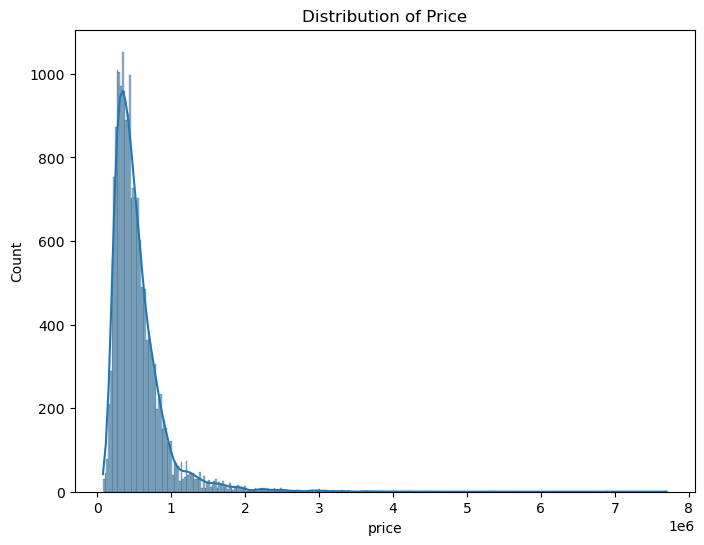

In [33]:
# Distribution of the target variable
plt.figure(figsize=(8, 6))
sns.histplot(data_updated, x='price', kde=True)
plt.title("Distribution of Price")
plt.show()

The diagram shows a positively skewed distribution of the price

In [34]:
### Check Correlation
data_updated.corr(numeric_only=True)

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,zipcode,lat,long,sqft_living15,sqft_lot15,YrsB4Renovation
price,1.000000,0.309204,0.525889,0.702328,0.087937,0.256355,0.265969,0.387878,0.035290,0.667738,0.605143,0.325008,-0.053166,0.306507,0.022101,0.586415,0.083192,0.110193
bedrooms,0.309204,1.000000,0.513840,0.577998,0.032262,0.179044,0.000061,0.072502,0.025710,0.356882,0.479210,0.302683,-0.152628,-0.009521,0.131093,0.392476,0.030479,0.005652
bathrooms,0.525889,0.513840,1.000000,0.755278,0.087884,0.504071,0.064626,0.171079,-0.128015,0.666493,0.686456,0.282693,-0.204306,0.024994,0.224479,0.570129,0.088834,0.006731
sqft_living,0.702328,0.577998,0.755278,1.000000,0.172941,0.354688,0.106039,0.263900,-0.061294,0.763101,0.876678,0.434576,-0.198906,0.052986,0.240797,0.756389,0.184466,0.023686
sqft_lot,0.087937,0.032262,0.087884,0.172941,1.000000,-0.007522,0.021211,0.050720,-0.009671,0.113402,0.183461,0.015533,-0.129355,-0.085457,0.230583,0.143428,0.720649,-0.000082
floors,0.256355,0.179044,0.504071,0.354688,-0.007522,1.000000,0.020307,0.016255,-0.264280,0.459214,0.524225,-0.245144,-0.058976,0.048977,0.125922,0.280294,-0.011545,-0.035371
waterfront,0.265969,0.000061,0.064626,0.106039,0.021211,0.020307,1.000000,0.408943,0.016728,0.083602,0.072201,0.084949,0.028152,-0.011567,-0.036371,0.085174,0.030250,0.070794
view,0.387878,0.072502,0.171079,0.263900,0.050720,0.016255,0.408943,1.000000,0.046585,0.227733,0.150351,0.266334,0.085423,0.014825,-0.089194,0.261981,0.052490,0.093260
condition,0.035290,0.025710,-0.128015,-0.061294,-0.009671,-0.264280,0.016728,0.046585,1.000000,-0.148508,-0.159289,0.170972,0.003437,-0.015592,-0.106285,-0.093493,-0.004860,-0.026427
grade,0.667738,0.356882,0.666493,0.763101,0.113402,0.459214,0.083602,0.227733,-0.148508,1.000000,0.756382,0.168023,-0.185131,0.113380,0.199187,0.713574,0.121921,-0.019954


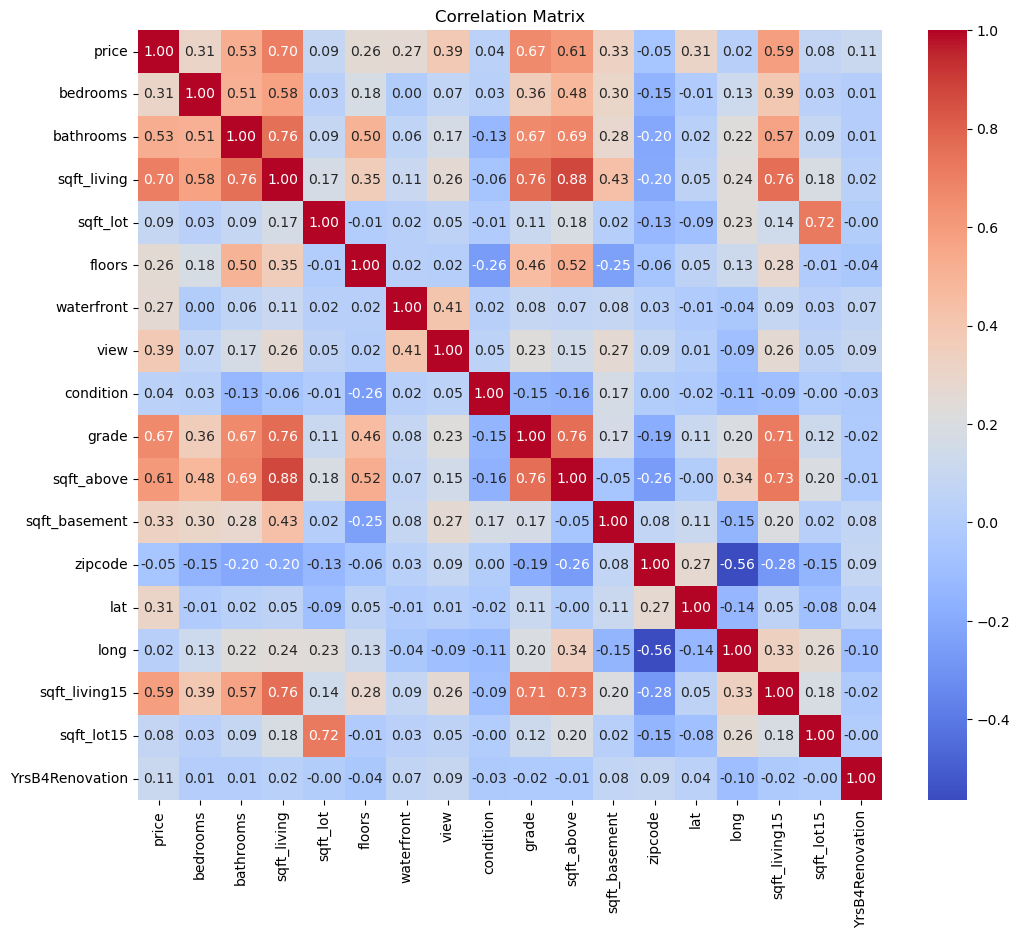

In [35]:
# Correlation matrix
plt.figure(figsize=(12, 10))
sns.heatmap(data_updated.corr(numeric_only=True), annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Correlation Matrix")
plt.show()

We have so many numbers on the heatmap but we are only interested in the large values that are equal or more than 0.75

This will check for multicollinearity within independent variables. High multicollinearity might lead to poor performance of our model

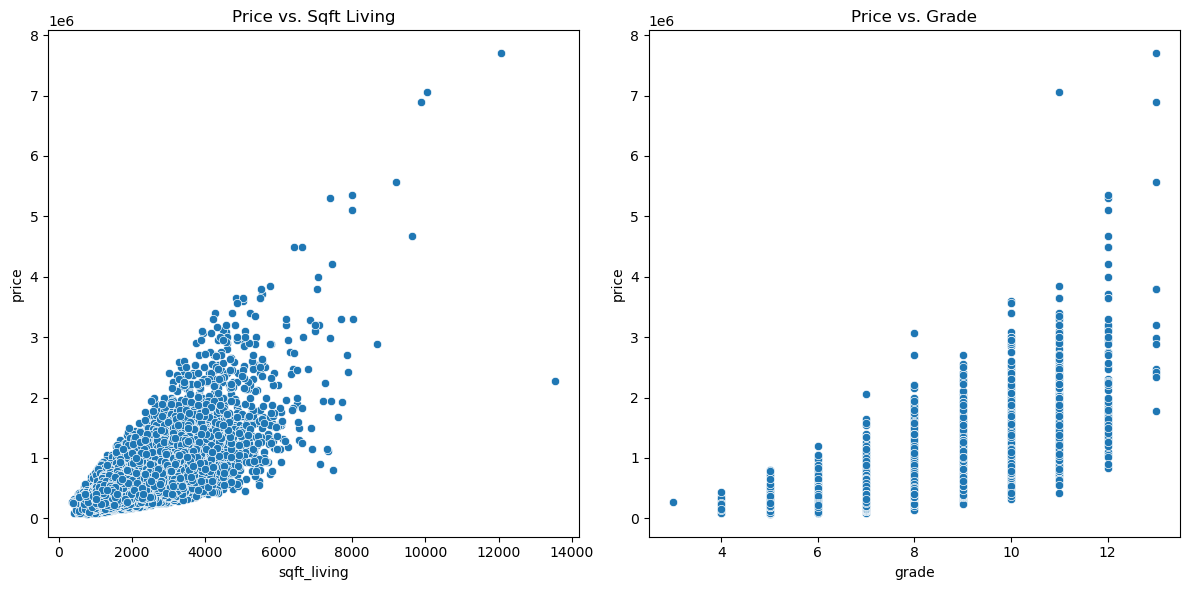

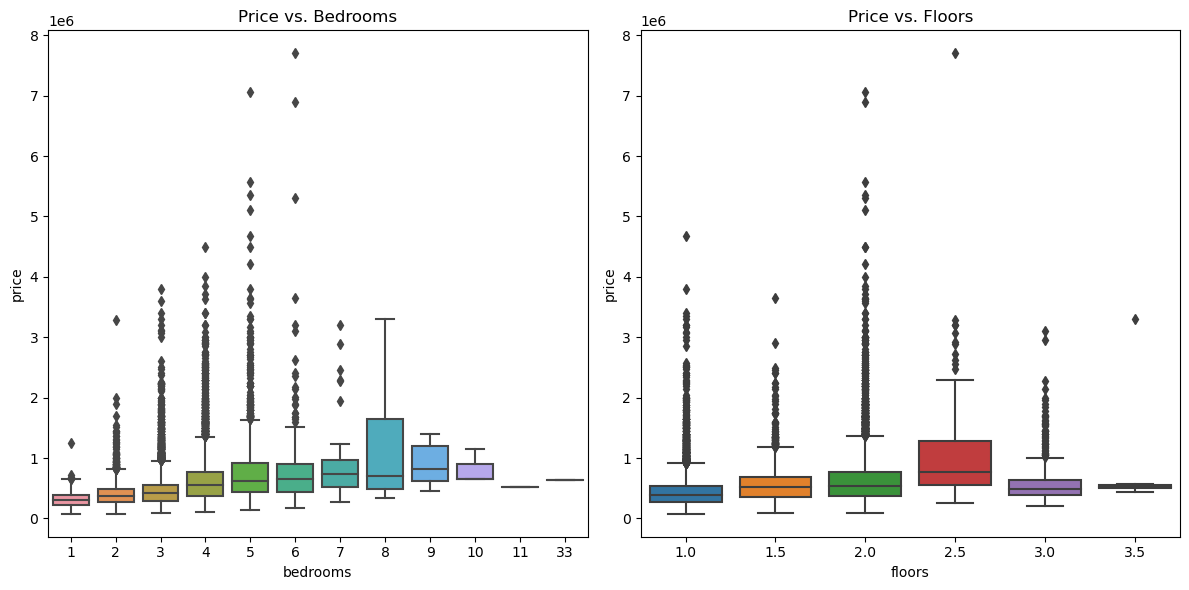

In [36]:
# Scatter plots
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.scatterplot(data_updated, x='sqft_living', y='price')
plt.title("Price vs. Sqft Living")

plt.subplot(1, 2, 2)
sns.scatterplot(data_updated, x='grade', y='price')
plt.title("Price vs. Grade")

plt.tight_layout()
plt.show()

# Box plots
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.boxplot(data_updated, x='bedrooms', y='price')
plt.title("Price vs. Bedrooms")

plt.subplot(1, 2, 2)
sns.boxplot(data_updated, x='floors', y='price')
plt.title("Price vs. Floors")

plt.tight_layout()
plt.show()

In [37]:
data = data_updated
data.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,zipcode,lat,long,sqft_living15,sqft_lot15,YrsB4Renovation
0,2014-10-13,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0.0,98178,47.5112,-122.257,1340,5650,-1955.0
1,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400.0,98125,47.7210,-122.319,1690,7639,40.0
2,2015-02-25,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0.0,98028,47.7379,-122.233,2720,8062,-1933.0
3,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910.0,98136,47.5208,-122.393,1360,5000,-1965.0
4,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0.0,98074,47.6168,-122.045,1800,7503,-1987.0


In [38]:
data.shape

(21143, 19)

## 5. Model Iterations

In [39]:
data.corr(numeric_only=True)['price']

price              1.000000
bedrooms           0.309204
bathrooms          0.525889
sqft_living        0.702328
sqft_lot           0.087937
floors             0.256355
waterfront         0.265969
view               0.387878
condition          0.035290
grade              0.667738
sqft_above         0.605143
sqft_basement      0.325008
zipcode           -0.053166
lat                0.306507
long               0.022101
sqft_living15      0.586415
sqft_lot15         0.083192
YrsB4Renovation    0.110193
Name: price, dtype: float64

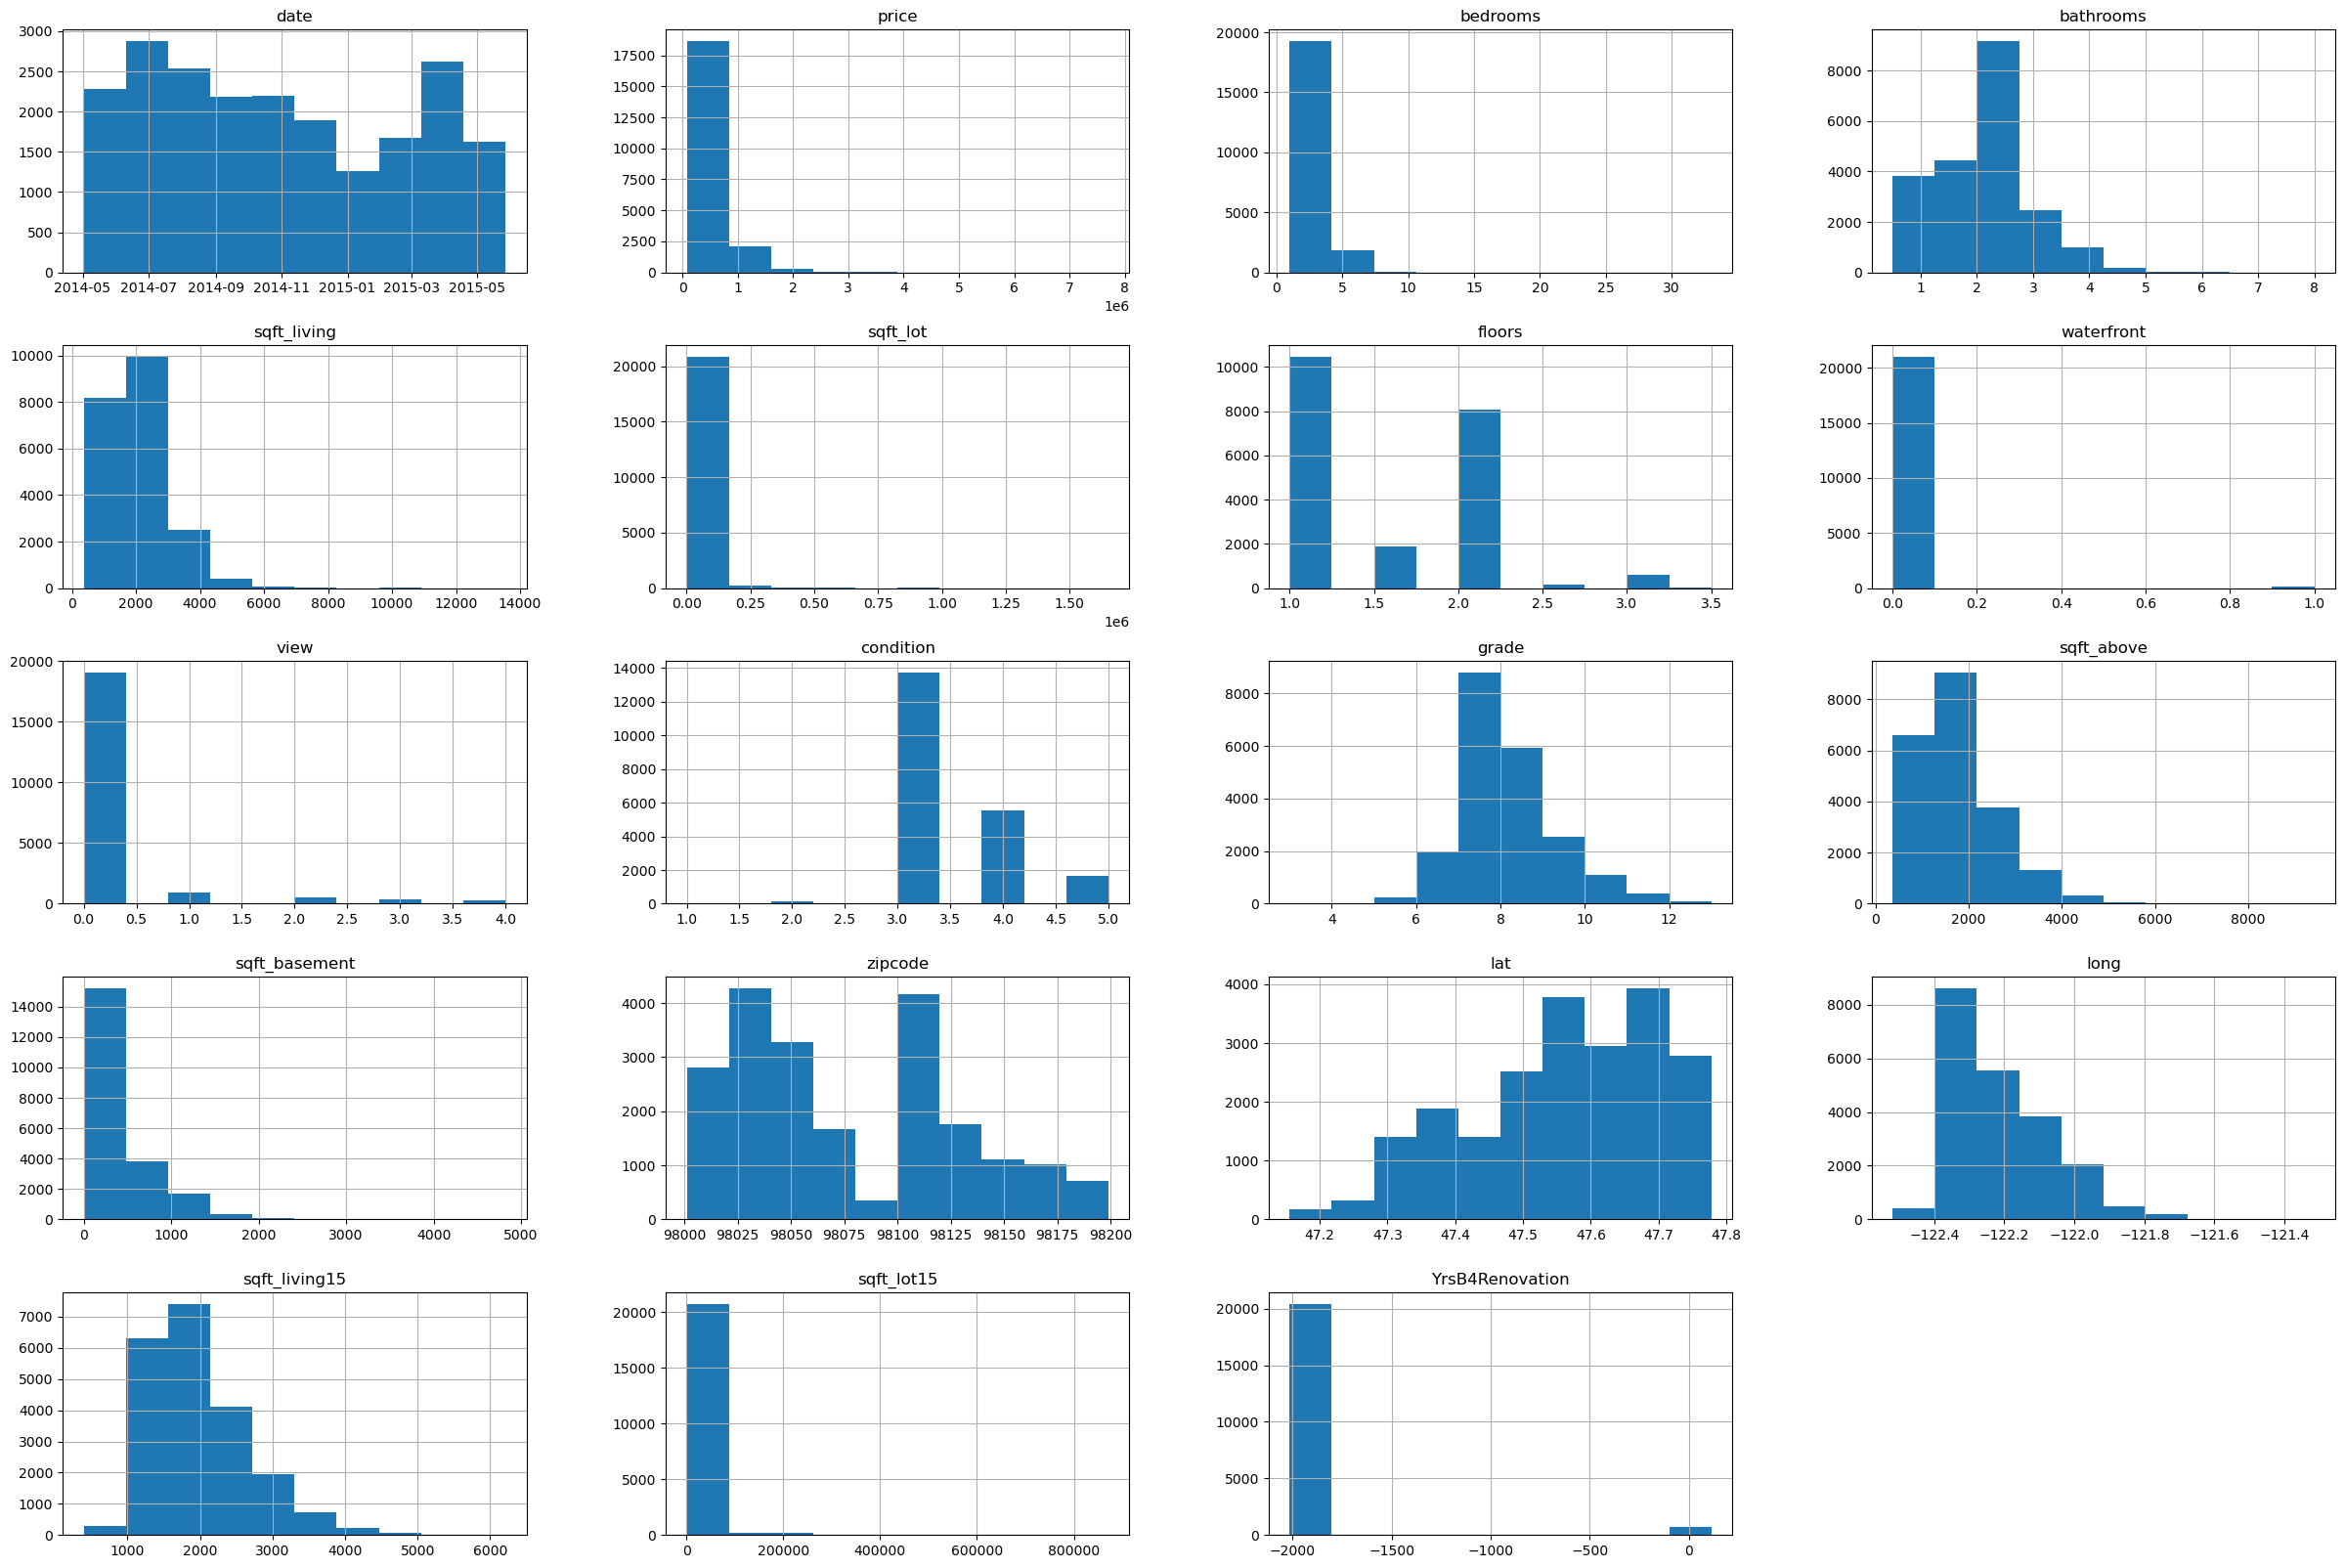

In [40]:
data.hist(figsize=(30,20))
plt.show()

###  a) Basic Model: Simple Linear Regression with 'sqft_living': ( Baseline Model)

In [41]:
import statsmodels.api as sm

In [42]:
# Selecting the feature and target variable
X_baseline = data[['sqft_living']]  # Feature (independent variable)
y = data['price'] # Target (dependent variable)

baseline_model = sm.OLS(y, sm.add_constant(X_baseline))
baseline_results = baseline_model.fit()

print(baseline_results.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.493
Model:                            OLS   Adj. R-squared:                  0.493
Method:                 Least Squares   F-statistic:                 2.058e+04
Date:                Tue, 02 Jan 2024   Prob (F-statistic):               0.00
Time:                        19:53:21   Log-Likelihood:            -2.9378e+05
No. Observations:               21143   AIC:                         5.876e+05
Df Residuals:                   21141   BIC:                         5.876e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const       -4.513e+04   4462.443    -10.113      

Regression Line:

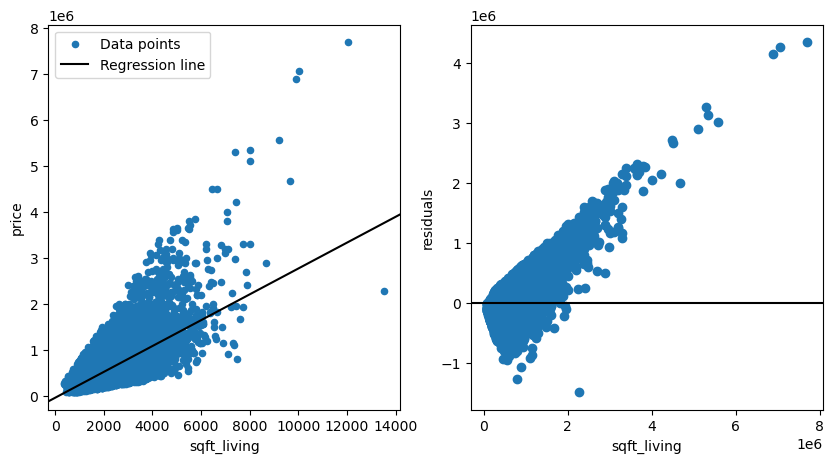

In [43]:
fig, ax = plt.subplots(1,2, figsize= (10,5))
data.plot.scatter(x="sqft_living", y="price", label="Data points", ax=ax[0])
sm.graphics.abline_plot(model_results=baseline_results, label="Regression line", ax=ax[0], color="black")
ax[0].legend();

ax[1].scatter(data["price"], baseline_results.resid)
ax[1].axhline(y=0, color="black")
ax[1].set_xlabel("sqft_living")
ax[1].set_ylabel("residuals");

The residuals:

In [44]:
# Log-transform target and predictor variables in baseline model
Xlog_baseline = np.log(data[['sqft_living']])  # Feature (independent variable)
ylog = np.log(data['price']) # Target (dependent variable)

log_baseline_model = sm.OLS(ylog, sm.add_constant(Xlog_baseline))
log_baseline_results = log_baseline_model.fit()

print(log_baseline_results.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.455
Model:                            OLS   Adj. R-squared:                  0.455
Method:                 Least Squares   F-statistic:                 1.766e+04
Date:                Tue, 02 Jan 2024   Prob (F-statistic):               0.00
Time:                        19:53:22   Log-Likelihood:                -10023.
No. Observations:               21143   AIC:                         2.005e+04
Df Residuals:                   21141   BIC:                         2.007e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           6.7210      0.048    140.939      

A 1% increase in sqft_living leads to a 0.84% increase in house price

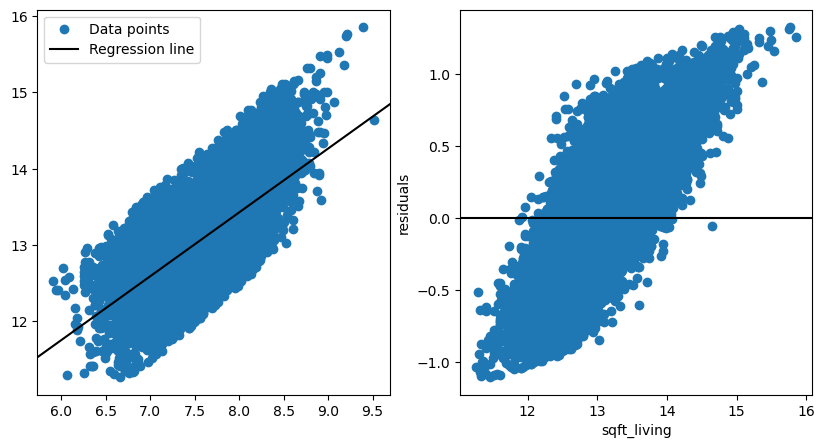

In [45]:
fig, ax = plt.subplots(1,2, figsize= (10,5))
ax[0].scatter(np.log(data['sqft_living']), np.log(data["price"]), label="Data points")
sm.graphics.abline_plot(model_results=log_baseline_results, label="Regression line", ax=ax[0], color="black")
ax[0].legend();

ax[1].scatter(np.log(data["price"]), log_baseline_results.resid)
ax[1].axhline(y=0, color="black")
ax[1].set_xlabel("sqft_living")
ax[1].set_ylabel("residuals");

Despite having a slightly lower R-squared value, the model with log-tranformation baseline model performs better based on the relatively AIC and BIC values


### b) Add More Features for Multiple Regression with raw data

In [46]:
features = ['sqft_living', 'floors', 'lat','zipcode', 'view']

X_one= data[features].copy()
X_one['sqft_living'] = np.log(X_one['sqft_living'])
y = np.log(data['price']) 

subset_model_one = sm.OLS(y, sm.add_constant(X_one))
subset_results_one = subset_model_one.fit()

print(subset_results_one.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.672
Model:                            OLS   Adj. R-squared:                  0.672
Method:                 Least Squares   F-statistic:                     8673.
Date:                Tue, 02 Jan 2024   Prob (F-statistic):               0.00
Time:                        19:53:22   Log-Likelihood:                -4649.1
No. Observations:               21143   AIC:                             9310.
Df Residuals:                   21137   BIC:                             9358.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const         -33.6187      3.972     -8.464      

### c) Add More Features for Multiple Regression and using standardised predictor variables 

In [47]:
X_two = X_one.copy()
for col in X_two.columns:
    X_two[col] = (X_two[col] - X_two[col].mean())/X_two[col].std()

subset_model_two = sm.OLS(y, sm.add_constant(X_two))
subset_results_two = subset_model_two.fit()

print(subset_results_two.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.672
Model:                            OLS   Adj. R-squared:                  0.672
Method:                 Least Squares   F-statistic:                     8673.
Date:                Tue, 02 Jan 2024   Prob (F-statistic):               0.00
Time:                        19:53:22   Log-Likelihood:                -4649.1
No. Observations:               21143   AIC:                             9310.
Df Residuals:                   21137   BIC:                             9358.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const          13.0484      0.002   6292.472      

Based on the standardised model, sqft_living has the largest impact on the house prices since it has the largest co-efficient. 

In [48]:
#Mean centered predictors
X_centered = X_one.copy()
for col in X_centered.columns:
    X_centered[col] -= X_centered[col].mean()

model = sm.OLS(y, sm.add_constant(X_centered)).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.672
Model:                            OLS   Adj. R-squared:                  0.672
Method:                 Least Squares   F-statistic:                     8673.
Date:                Tue, 02 Jan 2024   Prob (F-statistic):               0.00
Time:                        19:53:22   Log-Likelihood:                -4649.1
No. Observations:               21143   AIC:                             9310.
Df Residuals:                   21137   BIC:                             9358.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const          13.0484      0.002   6292.472      

Since only price, i.e. the target variable, and sqft_living has been been log-transformed, the model interpretation means that for 1 unit increase in floors leads to a 9.4% increase in house prices. 
A one level improvement in condition leads to a 7.34% increase in house prices while a one level improvement in view leads to a 14% increase house price

### d) Mean Square Errors

In [49]:
from sklearn.metrics import mean_squared_error

In [50]:
# Make predictions using the baseline model
predictions = baseline_results.predict(sm.add_constant(X_baseline))

# Calculate MSE
mse = mean_squared_error(y, predictions)
print(f"Mean Squared Error: {mse}")

Mean Squared Error: 358961456587.6772


In [51]:
# Make predictions using the log-transformed baseline model
predictions = log_baseline_results.predict(sm.add_constant(Xlog_baseline))

# Calculate MSE
mse = mean_squared_error(y, predictions)
print(f"Mean Squared Error: {mse}")

Mean Squared Error: 0.15111301799281243


In [52]:
# Make predictions using the mean-centered model
predictions = subset_results_one.predict(sm.add_constant(X_one))

# Calculate MSE
mse = mean_squared_error(y, predictions)
print(f"Mean Squared Error: {mse}")

Mean Squared Error: 0.09089019618976422


In [53]:
# Make predictions using the standardised model
predictions = subset_results_two.predict(sm.add_constant(X_two))

# Calculate MSE
mse = mean_squared_error(y, predictions)
print(f"Mean Squared Error: {mse}")

Mean Squared Error: 0.09089019618976431


## 6. Asumptions

We will inspect **linearity, independence, nomrality and Equal Variance**

### a) The Linearity Assumption

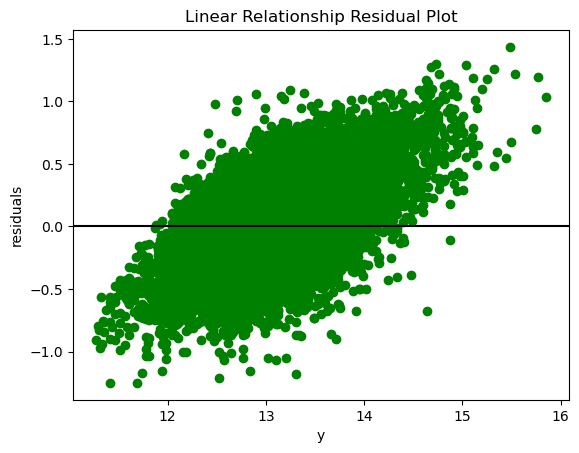

In [54]:
fig, ax = plt.subplots()

ax.scatter(y, subset_results_two.resid, color="green")
ax.axhline(y=0, color="black")
ax.set_xlabel("y")
ax.set_ylabel("residuals")
ax.set_title("Linear Relationship Residual Plot");

In [55]:
# performing a rainbow test to test linearity statistically
from statsmodels.stats.diagnostic import linear_rainbow
linear_rainbow(subset_results_one)

(0.9604358952019966, 0.9810006700501094)

### b) Independence Assumption

The Durbin-Watson value in our instance is 1.994, which is quite near to 2, indicating that the residuals show little indication of first-order autocorrelation. This is advantageous since it upholds the regression model's independence assumption. The independence assumption, which presupposes that the residuals are uncorrelated with one another, is essential to the validity of regression analysis.

In conclusion, a Durbin-Watson value of 1.994 indicates that the residuals of the regression model do not substantially display first-order autocorrelation, supporting the independence assumption.

### c) Normality Assumption

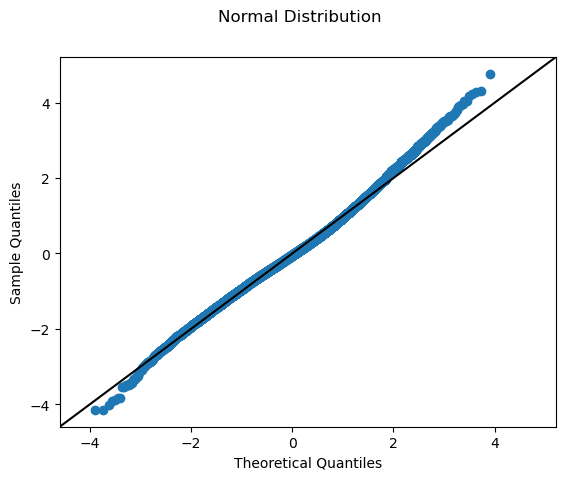

In [56]:
# Use qqplot function from StatsModels
fig, ax = plt.subplots()
sm.graphics.qqplot(subset_results_two.resid, dist=stats.norm, line='45', fit=True, ax=ax)

# Customize plot appearance
line = ax.lines[1]
line.set_color("black")
fig.suptitle("Normal Distribution");

From the above plot we can see that our model has passed the normality assumption. 

### d) The Homoscedasticity Assumption

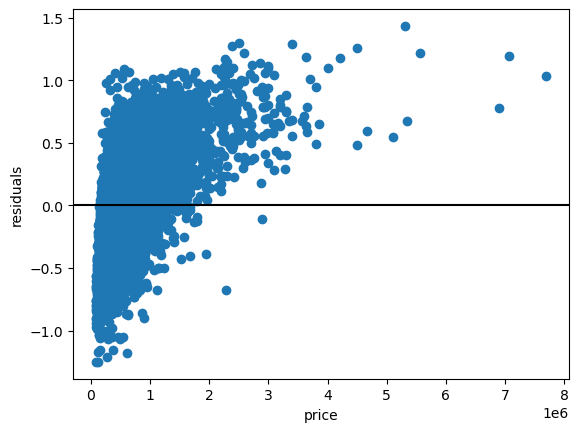

In [57]:
fig, ax = plt.subplots()

ax.scatter(x = data["price"], y = subset_results_two.resid)
ax.axhline(y=0, color="black")
ax.set_xlabel("price")
ax.set_ylabel("residuals");

Model residual plot shows an increase in error rate with increasing house prices

## 7. Results Interpretation

Based on the correlation matrix, and correlation heatmap, and the model results for the standardised data, squarefoot living variable is the single most signficant variable in affecting house prices, then followed by view based on our model.

A 1% increase in sqft_living leads to a 0.84% increase in house price

Since only price, i.e. the target variable, and sqft_living has been been log-transformed, the model interpretation means that for 1 unit increase in floors leads to a 9.4% increase in house prices. 
A one level improvement in condition leads to a 7.34% increase in house prices while a one level improvement in view leads to a 14% increase house price

## 8. Limitations and Scope

1. The model's error rate seems to increase with increasing house prices hence predicitions for high house prices may not be as accurate as with lower house prices
2. The project's scope is limited to factors directly related to unique property features and the effects of renovations or upgrades. External factors, such as market volatility, regulatory changes, and broader economic shifts, are not included in the model
3. Latitude and Zipcode predictor variables seem to have a significant impact on house prices. However without further context on geography of the regions from which the data emanated it is difficult to interpret this relationship. 

## 9. Recommendations

1. Further to no.3 above, more analysis is required to show how geographical location of a house affect it's price
2. Ways to improve the accuracy, especially for high-value homes, so we can provide even more reliable estimates across the entire range of house prices is needed.
3. Market Segmentation: To determine market segmentation or particular buyer preferences, examine the link between the independent factors and housing prices. For example, a market sector of luxury or high-end homes may be indicated if the prices of houses tend to be higher.